<a href="https://colab.research.google.com/github/afrinmim1/Object_Detection_From_Image/blob/main/Faster_R_CNN_for_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries


In [13]:
import cv2                     # OpenCV for image processing
import torch                   # PyTorch for deep learning
import torchvision.transforms as T # Transformations for image preprocessing
from torchvision.models.detection import fasterrcnn_resnet50_fpn # Pre-trained Faster R-CNN model
from PIL import Image # Python Imaging Library for image loading
import matplotlib.pyplot as plt # Import the matplotlib library for displaying images

# Loading Pre-Trained Model

In [ ]:
model = fasterrcnn_resnet50_fpn(pretrained=True) ## Loading a pre-trained faster R-CNN model
model.eval() # Model in evaluation mode

# Inseting Image



In [15]:
image_path ="/content/download.jpg"
img = Image.open(image_path)

# Using Transformation


In [16]:
transform = T.Compose([T.ToTensor()])
img = transform(img)
img = img.unsqueeze(0)

# Object Detection

In [17]:
  with torch.no_grad():
    predictions = model(img)
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    confidence_threshold = 0.5  # Adjust as needed
    filtered_indices = (scores >= confidence_threshold)
    filtered_boxes = boxes[filtered_indices]
    filtered_labels = labels[filtered_indices]
    filtered_scores = scores[filtered_indices]

  # Load the image using OpenCV for visualization
  image_cv2 = cv2.imread(image_path)

In [18]:
# Draw bounding boxes and labels on the image
for box, label, score in zip(filtered_boxes, filtered_labels, filtered_scores):
    box = [int(val) for val in box]
    label_str = f"Label: {label.item()}, Score: {score:.2f}"
    cv2.rectangle(image_cv2, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    cv2.putText(image_cv2, label_str, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Object_Detection

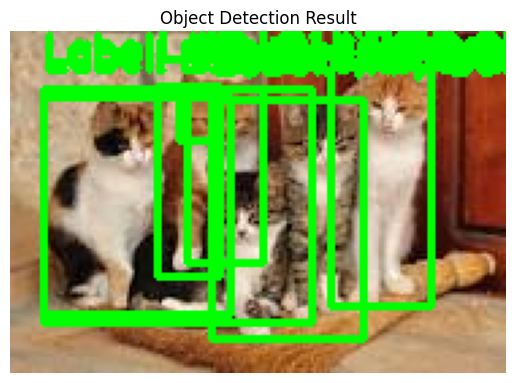

In [19]:
plt.imshow(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))
plt.title("Object Detection Result")
plt.axis('off')
plt.show()
